# Descoberta Guiada Aula 3


# Classificador Naive Bayes

### Bibliotecas necessárias:

In [35]:
from sklearn.datasets import load_breast_cancer #dataset para casos de cancer
from sklearn.naive_bayes import BernoulliNB # Naive Bayes para o caso de uma distribuição de Bernoulli
from sklearn.naive_bayes import GaussianNB # Naive Bayes para o caso de uma distribuição de Gaussiana
from sklearn.model_selection import train_test_split # separação do dataset para validação e treinamento
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # métricas de avaliação do modelo
from sklearn.metrics import f1_score, classification_report

import seaborn as sns # biblioteca par geração de gráficos
import matplotlib.pyplot as plt

# Coleta dos dados

In [2]:
dados = load_breast_cancer(as_frame=True)

# Preparação dos dados

In [18]:
X = dados['data']
Y = dados['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.15, shuffle=True,
                                                    random_state=2024)

# Validação do balanceamento

In [22]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.1243,0.11600,0.2210,0.12940,0.2567,0.05737
196,13.770,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.065260,0.1834,0.06877,...,16.390,34.01,111.60,806.9,0.1737,0.31220,0.3809,0.16730,0.3080,0.09333
533,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.101500,0.2166,0.05419,...,23.230,27.15,152.00,1645.0,0.1097,0.25340,0.3092,0.16130,0.3220,0.06386
182,15.700,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.051890,0.1618,0.05549,...,20.110,32.82,129.30,1269.0,0.1414,0.35470,0.2902,0.15410,0.3437,0.08631
329,16.260,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.079810,0.1869,0.06532,...,17.730,25.21,113.70,975.2,0.1426,0.21160,0.3344,0.10470,0.2736,0.07953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.023610,0.1167,0.06217,...,12.370,17.70,79.12,467.2,0.1121,0.16100,0.1648,0.06296,0.1811,0.07427
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.6399,0.19700,0.2972,0.09075
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,...,10.930,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,...,8.678,31.89,54.49,223.6,0.1596,0.30640,0.3393,0.05000,0.2790,0.10660


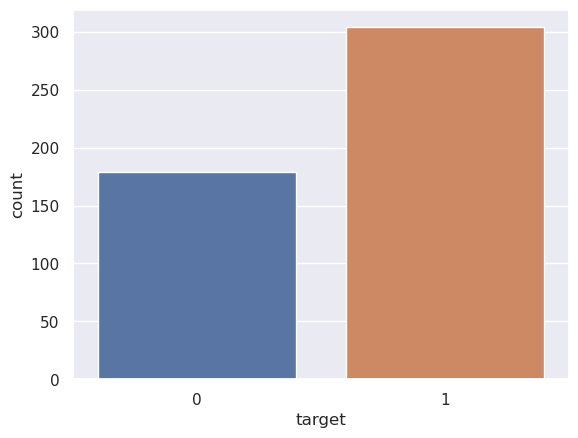

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x=y_train)

#Aplicação do Modelo

In [20]:
modelo_naive = BernoulliNB()
modelo_naive.fit(x_train, y_train)

BernoulliNB()

In [21]:
y_pred = modelo_naive.predict(x_test)

# Métricas de avaliação
Vamos plotar e avaliar a matriz de confusão dos resultados

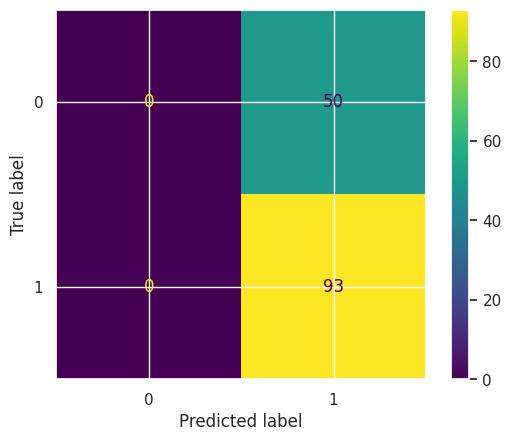

In [7]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Análise:
O que essa matriz de confusão te dis sobre o modelo?

Teste agora esse mesmo dataset, porém utilizando um modelo Naive Bayes Gaussiano

In [24]:
naive_gaussian = GaussianNB()

In [26]:
naive_gaussian.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred_g = naive_gaussian.predict(x_test)

In [28]:
y_pred_g

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

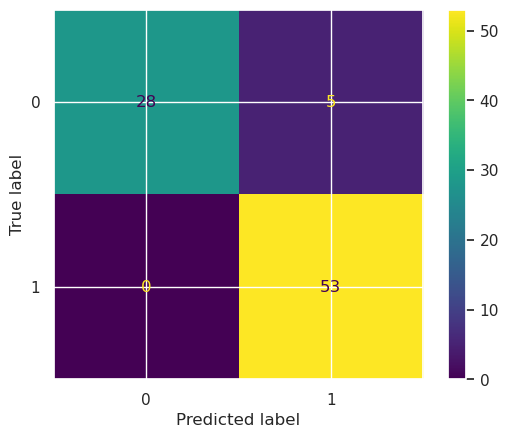

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_g)).plot()

In [34]:
f1_score(y_test, y_pred_g)

0.9549549549549551

In [36]:
print(classification_report(y_test, y_pred_g))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.91      1.00      0.95        53

    accuracy                           0.94        86
   macro avg       0.96      0.92      0.94        86
weighted avg       0.95      0.94      0.94        86

